### Day 3: Univariate Analysis - Understanding Individual Features

##### What is Univariate Analysis?
Univariate Analysis is the simplest form of data analysis where we examine one variable at a time to understand its distribution, central tendency, and spread.

In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('../Datasets/train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Categorical Data

a. Countplot

<Axes: xlabel='Survived'>

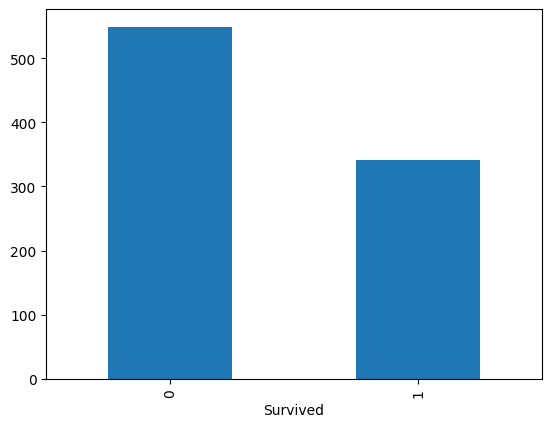

In [26]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked', ylabel='count'>

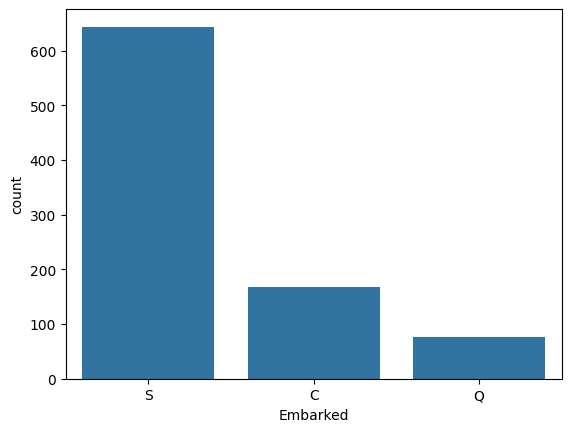

In [27]:
sns.countplot(x=df['Embarked'])
# or sns.countplot(x='Embarked', data=df)

b. PieChart

<Axes: ylabel='count'>

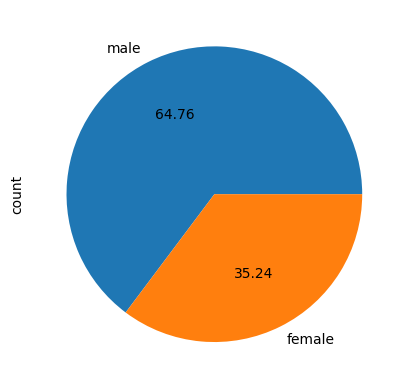

In [28]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

2. Numerical Data

a. Histogram

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

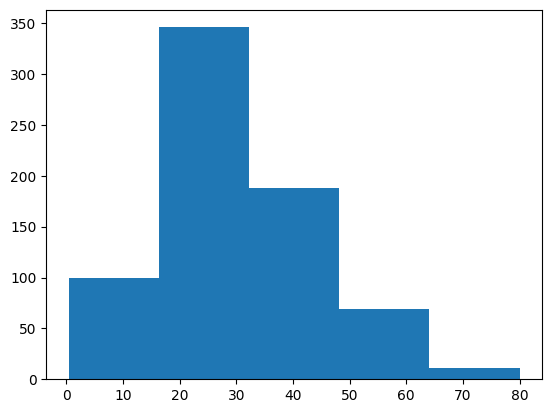

In [29]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

b. Distplot

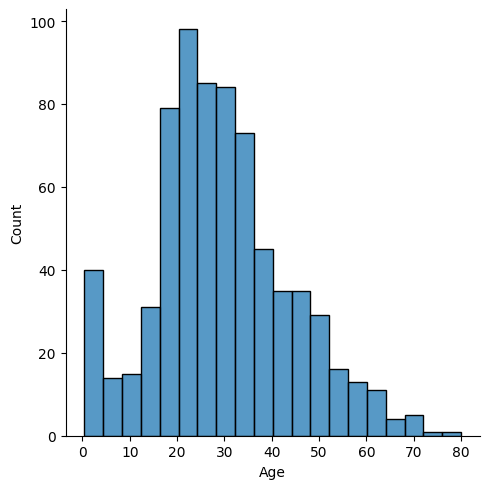

In [30]:
sns.displot(df['Age'])

c. Boxplot

<Axes: xlabel='Age'>

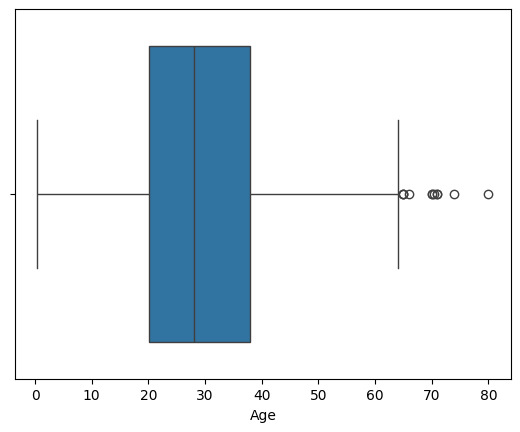

In [31]:
sns.boxplot(x=df['Age'])

In [32]:
df['Age'].min()

np.float64(0.42)

In [33]:
df['Age'].max()

np.float64(80.0)

In [34]:
df['Age'].mean()

np.float64(29.69911764705882)

In [35]:
df['Age'].skew()

np.float64(0.38910778230082704)

🎻 Violin Plot Analysis:



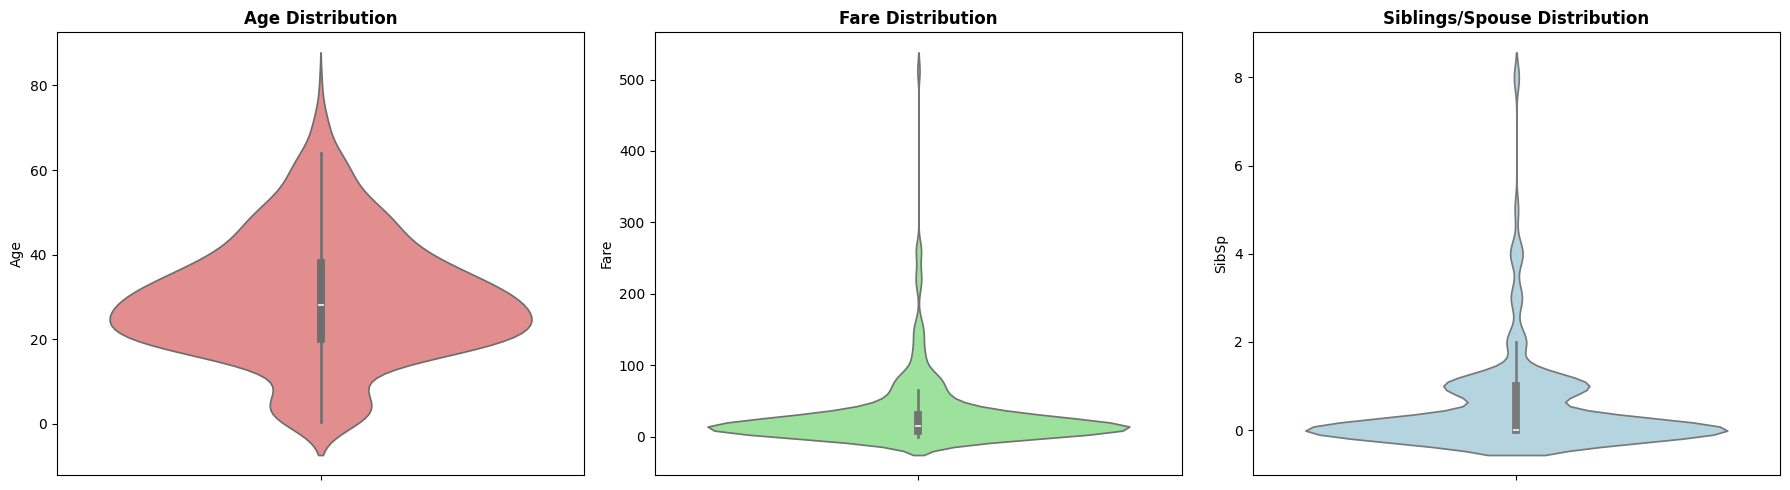

In [36]:
# Violin plot - shows distribution shape better than box plot
print("🎻 Violin Plot Analysis:\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(y=df['Age'].dropna(), ax=axes[0], color='lightcoral')
axes[0].set_title('Age Distribution', fontweight='bold')

sns.violinplot(y=df['Fare'].dropna(), ax=axes[1], color='lightgreen')
axes[1].set_title('Fare Distribution', fontweight='bold')

sns.violinplot(y=df['SibSp'], ax=axes[2], color='lightblue')
axes[2].set_title('Siblings/Spouse Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
# Outlier detection using IQR (Interquartile Range) method
print("🚨 Outlier Detection:\n")

for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"{col}:")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Outlier Range: [{outliers.min():.2f}, {outliers.max():.2f}]")
    print("-" * 60)

🚨 Outlier Detection:

Age:
  Lower Bound: -6.69
  Upper Bound: 64.81
  Number of Outliers: 11 (1.23%)
  Outlier Range: [65.00, 80.00]
------------------------------------------------------------
Fare:
  Lower Bound: -26.72
  Upper Bound: 65.63
  Number of Outliers: 116 (13.02%)
  Outlier Range: [66.60, 512.33]
------------------------------------------------------------
